# Lesson 2.矩阵运算基础、矩阵求导与最小二乘法

&emsp;&emsp;在Lesson 1中，我们介绍了关于机器学习的一般建模流程，并且在基本没有数学公式和代码的情况下，简单介绍了关于线性回归的一般实现形式。不过这只是在初学阶段、为了不增加基础概念理解难度所采取的方法，但所有的技术最终都是为了解决实际问题的，因此，接下来，我们就在之前的基础上更进一步，从一个更加严谨的理论体系出发、来尝试进行一种更加贴合实际应用所采用的一般方法的建模方法的学习。

In [1]:
import numpy as np
import pandas as pd

## 一、NumPy矩阵运算基础

&emsp;&emsp;在进入到本节正式内容之前，我们需要先补充一些矩阵相关基础概念，以及矩阵运算的基本方法。

&emsp;&emsp;在机器学习基础阶段，需要掌握的矩阵及线性代数基本理论包括：
- 矩阵的形变及特殊矩阵的构造方法：包括矩阵的转置、对角矩阵的创建、单位矩阵的创建、上/下三角矩阵的创建等；
- 矩阵的基本运算：包括矩阵乘法、向量内积、矩阵和向量的乘法等；
- 矩阵的线性代数运算：包括矩阵的迹、矩阵的秩、逆矩阵的求解、伴随矩阵和广义逆矩阵等；
- 矩阵分解运算：特征分解、奇异值分解和SVD分解等。      
本节将先介绍前三部分内容，矩阵分解部分内容将在后续补充。

### 1.NumPy中的矩阵表示

&emsp;&emsp;在NumPy中，二维数组(array)和matrix类型对象都可以用于表示矩阵，并且也都具备矩阵的代数学方法。

- 利用数组创建矩阵

In [2]:
A = np.array([[1, 2], [1, 1]])
A

array([[1, 2],
       [1, 1]])

In [3]:
type(A)

numpy.ndarray

- 利用mat创建矩阵

In [4]:
AM = np.mat(A)
AM

matrix([[1, 2],
        [1, 1]])

In [5]:
type(AM)

numpy.matrix

关于两种对象类型的选取，此处进行简单说明：      
- NumPy中的matrix类型对象和MATLAB中的matrix类型等价，和NumPy中数组类型对象底层基本结构不同；      
- 在NumPy中，针对大规模数据，数组类型对象的计算速度要快于矩阵类型对象；      
- 矩阵类型对象可以通过运算符直接进行矩阵乘法，而二维数组要进行矩阵乘法（及其他矩阵运算），则必须要使用包括linalg（线性代数运算）模块在内的相关函数。

In [7]:
AM * AM

matrix([[3, 4],
        [2, 3]])

In [8]:
A.dot(A)

array([[3, 4],
       [2, 3]])

In [10]:
# 新版NumPy也支持使用符号进行矩阵乘法
A @ A

array([[3, 4],
       [2, 3]])

为了执行更高效的计算、以及确保代码整体基本对象类型统一，课程如无说明，将统一使用二维数组表示矩阵。

### 2.NumPy中特殊矩阵构造方法

&emsp;&emsp;在实际线性代数运算过程中，经常涉及一些特殊矩阵，如单位矩阵、对角矩阵等，相关创建方法如下：

|**函数**|**描述**|
| :------:| :------: |
| a.T        | 数组a转置| 
| np.eye(n)       | 创建包含n个分量的单位矩阵 | 
| np.diag(a1)        | 以a1中各元素，创建对角矩阵 | 
| np.triu(a)        | 取矩阵a中的上三角矩阵 | 
| np.tril(a)        | 取矩阵a中的下三角矩阵 | 

In [31]:
# 创建一个2*3的矩阵
a1 = np.arange(1, 7).reshape(2, 3)
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
# 转置
a1.T

array([[1, 4],
       [2, 5],
       [3, 6]])

> 矩阵的转置就是每个元素行列位置互换

In [8]:
# 创建单位矩阵
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

> 单位矩阵之所以被称为“单位”，核心原因在于单位矩阵和任何矩阵相乘，都将返回原矩阵。

In [34]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [39]:
np.diag(a)

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

In [40]:
# 对角线向上偏移一位
np.diag(a, 1)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0, 0]])

In [41]:
# 对角线向下偏移一位
np.diag(a, -1)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 4, 0]])

In [42]:
a1 = np.arange(9).reshape(3, 3)
a1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [43]:
# 取上三角矩阵
np.triu(a1)

array([[0, 1, 2],
       [0, 4, 5],
       [0, 0, 8]])

In [44]:
# 上三角矩阵向左下偏移一位
np.triu(a1, -1)

array([[0, 1, 2],
       [3, 4, 5],
       [0, 7, 8]])

In [45]:
# 上三角矩阵向右上偏移一位
np.triu(a1, 1)

array([[0, 1, 2],
       [0, 0, 5],
       [0, 0, 0]])

In [46]:
# 下三角矩阵
np.tril(a1)

array([[0, 0, 0],
       [3, 4, 0],
       [6, 7, 8]])

### 3.NumPy中矩阵基本运算

&emsp;&emsp;由于NumPy中我们使用二维数组来表述矩阵，因此二维数组也就具备了数组和矩阵的两重属性。其中数组属性决定的基本运算相对简单，基础运算（如加减乘除）就是对应位置元素进行逐元素计算，而矩阵属性决定的运算则稍显复杂，当然矩阵的相关线性代数运算将在下一小节讨论，在基础运算上，矩阵和数组核心的区别在于乘法运算。

&emsp;&emsp;当然，从另一个角度考虑，其实对于向量和矩阵这种具备一定结构的对象，有很多种容易混淆的计算规则。对于常用的计算规则，我们通过将其划分成三类以帮助大家理解：

|**描述**|**解释/函数**|
| :------:| :------: |
| 逐元素相乘        | 向量、矩阵通用 |
| 每个对应位置元素相乘        | * | 
|逐元素相乘后相加 | 也被称为点积（内积），向量，矩阵通用 | 
|向量点积       | vdot、dot、inner |
|矩阵点积       | vdot |
|矩阵乘法 | 代数学意义的矩阵相乘 | 
| 矩阵乘法        | dot、matmul、@ | 

-  \* :逐元素相乘

In [51]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [52]:
a * a

array([0, 1, 4, 9])

In [53]:
A = a.reshape(2, 2)
A

array([[0, 1],
       [2, 3]])

In [54]:
A * A

array([[0, 1],
       [4, 9]])

- 向量点积

&emsp;&emsp;所谓点积（也被称为内积），指的是向量或矩阵对应位置元素相乘后相加。向量点积有三种实现方法，分别是dot、vdot和ineer。

In [56]:
np.dot(a, a)

14

In [60]:
a.dot(a)

14

In [57]:
(a * a).sum()

14

In [63]:
np.vdot(a, a)

14

In [61]:
np.inner(a, a)

14

- 矩阵点积

&emsp;&emsp;值得注意的是，矩阵内积只有vdot一种方式实现。

In [67]:
A

array([[0, 1],
       [2, 3]])

In [65]:
np.vdot(A, A)

14

In [73]:
(A * A).sum()

14

> 注意，高维数组的inner并不是内积，而是一种类似tensordot的沿着尾轴实现和积的计算过程，该方法并不通用，此处暂不做介绍。

- 矩阵乘法

&emsp;&emsp;NumPy中，我们可以使用诸多方法实现矩阵乘法，包括dot、@、matmul等。

In [74]:
a1 = np.arange(1, 7).reshape(2, 3)
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [75]:
a2 = np.arange(1, 10).reshape(3, 3)
a2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [76]:
# 矩阵乘法
np.matmul(a1, a2)

array([[30, 36, 42],
       [66, 81, 96]])

此处也简单回顾矩阵乘法运算，上述相乘过程如下所示：

![5](https://i.loli.net/2021/01/14/gshVBOWM4QD2TiL.jpg)

> 值得注意的是，矩阵相乘要求左乘矩阵列数和右乘矩阵行数相同，而内积计算过程则严格要求两个向量/矩阵形状完全一致。

### 4.NumPy中矩阵代数运算

&emsp;&emsp;如果说矩阵的基本运算是矩阵基本性质，那么矩阵的线性代数运算，则是我们利用矩阵数据类型在求解实际问题过程中经常涉及到的线性代数方法，具体相关函数如下：

**<center>矩阵的线性代数运算</center>**

|**函数**|**描述**|
| :------:| :------: |
| np.trace(A)       | 矩阵的迹 |
| np.linalg.matrix_rank(A)       | 矩阵的秩 |
| np.linalg..det(A)         | 计算矩阵A的行列式 |  
| np.linalg.inv(A)        | 矩阵求逆 | 

同时，由于线性代数所涉及的数学基础知识较多，从实际应用的角度出发，我们将有所侧重的介绍实际应用过程中需要掌握的相关内容，并通过本节末尾的实际案例，来加深线性代数相关内容的理解。

> NumPy中的linalg是linear algebra（线性代数）的简写，也是NumPy中保存线性代数相关计算函数的模块。

- 矩阵的迹（trace）

&emsp;&emsp;矩阵的迹的运算相对简单，就是矩阵对角线元素之和，在NumPy中，可以使用trace函数进行计算。

In [78]:
A = np.array([[1, 2], [4, 5]])
A

array([[1, 2],
       [4, 5]])

In [79]:
np.trace(A)

6

当然，对于矩阵的迹来说，计算过程不需要是方正

In [80]:
B = np.arange(1, 7).reshape(2, 3)
B

array([[1, 2, 3],
       [4, 5, 6]])

In [81]:
np.trace(B)

6

- 矩阵的秩(rank)

&emsp;&emsp;矩阵的秩（rank），是指矩阵中行或列的极大线性无关数，且矩阵中行、列极大无关数总是相同的，任何矩阵的秩都是唯一值，满秩指的是方阵（行数和列数相同的矩阵）中行数、列数和秩相同，满秩矩阵有线性唯一解等重要特性，而其他矩阵也能通过求解秩来降维，同时，秩也是奇异值分解等运算中涉及到的重要概念。

> 所谓线性相关，其实也就是线性表示，如果$y=wx+b$，我们则称y可以由x线性表示，二者线性相关，反之则线性无关。类似，如果$y=w_1x_1w_2x_2+b$，则我们称y可以由$x_1、x_2$线性表示，y与$x_1、x_2$线性相关。

- matrix_rank计算矩阵的秩

In [11]:
A = np.array([[1, 3, 4], [2, 1, 3], [1, 1, 2]])
A

array([[1, 3, 4],
       [2, 1, 3],
       [1, 1, 2]])

In [12]:
np.linalg.matrix_rank(A)

2

对于矩阵A来说，第三列明显可以由第一列和第二列相加得出，因此极大线性无关组只有两列。

In [13]:
B = np.array([[1, 3, 4], [2, 1, 3], [1, 1, 10]])
B

array([[ 1,  3,  4],
       [ 2,  1,  3],
       [ 1,  1, 10]])

In [14]:
np.linalg.matrix_rank(B)

3

- 矩阵的行列式(det)

&emsp;&emsp;所谓行列式，我们可以简单将其理解为矩阵的一个基本性质或者属性，通过行列式的计算，我们能够知道矩阵是否可逆，从而可以进一步求解矩阵所对应的线性方程。当然，更加专业的解释，行列式的作为一个基本数学工具，实际上就是矩阵进行线性变换的伸缩因子。

对于任何一个n维方正，行列式计算过程如下：

<img src="https://i.loli.net/2021/01/14/AkeTpgOrctHoIiq.jpg" alt="7" style="zoom:50%;" />

更为简单的情况，如果对于一个2*2的矩阵，行列式的计算就是主对角线元素之积减去另外两个元素之积

In [15]:
A = np.array([[1, 2], [4, 5]])
A

array([[1, 2],
       [4, 5]])

In [89]:
np.linalg.det(A)

-2.9999999999999996

A的秩计算过程如下：

<img src="https://i.loli.net/2021/01/14/4DofvQesAwKca9u.jpg" alt="6" style="zoom:50%;" />

对于行列式的计算，要求矩阵必须是方阵，也就是行列数必须一致。

In [90]:
B = np.arange(1, 7).reshape(2, 3)
B

array([[1, 2, 3],
       [4, 5, 6]])

In [91]:
np.linalg.det(B)

LinAlgError: Last 2 dimensions of the array must be square

In [16]:
A = np.array([[1, 3, 4], [2, 1, 3], [1, 1, 2]])
A

array([[1, 3, 4],
       [2, 1, 3],
       [1, 1, 2]])

In [17]:
np.linalg.det(A)

0.0

- 矩阵的逆

&emsp;&emsp;对于满秩的方正来说，可以求其逆矩阵。从基本定义上来看，如果矩阵B和矩阵A相乘能够得到单位矩阵，即：

$$B \cdot A = E$$

则称B为A的逆矩阵，也可将B写作$A^{-1}$。当然，逆矩阵的性质是相互的，我们也可称A为B的逆矩阵，或者A和B互为逆矩阵。

In [92]:
A = np.array([[1, 1], [3, 1]])
A

array([[1, 1],
       [3, 1]])

然后使用inverse函数进行逆矩阵求解

In [93]:
np.linalg.inv(A)

array([[-0.5,  0.5],
       [ 1.5, -0.5]])

简单试探逆矩阵的基本特性

In [94]:
A.dot(np.linalg.inv(A))

array([[1.00000000e+00, 1.11022302e-16],
       [2.22044605e-16, 1.00000000e+00]])

> 当然，对于逆矩阵，还有很多其他理解角度。例如，从方程组求解角度来看，逆矩阵的存在就代表着方程组存在唯一解，并且逆矩阵本身也是方程组求解的关键；从矩阵分解角度来看，逆矩阵是一种最为基础的矩阵分解的形式。关于这些相关内容，我们都将在后续课程中逐渐介绍。

> 另外，在本节内容中，我们还将介绍solve（方程组求解）、lstsq（最小二乘法）相关函数的使用。

## 二、矩阵方程与向量求导方法

&emsp;&emsp;在铺垫了基本矩阵和线性代数相关知识后，接下来，我们尝试将Lesson 1中的方程组表示形式转化为矩阵表示形式，并借助矩阵方法进行相关方程的求解。并且，在Lesson 1中，我们已经简单讨论了最小二乘法这一优化算法的基本思路，最小二乘法一个最基础的优化算法，无论是其背后的数学推导还是实际应用，都值得继续深究。因此，本节开始，我们先从矩阵方程入手，先进行矩阵运算的相关方法的回顾、以及进行矩阵求导方法的讲解，再从一个更加严谨的数学角度出发，讨论最小二乘法的基本原理。

### 1.方程组求解与矩阵方程求解

&emsp;&emsp;在Lesson 1中，我们曾经利用损失函数的偏导函数方程组进行简单线性回归模型参数的求解：

<center>$ \begin{align} \frac{\partial{SSELoss}}{\partial{(w)}}  
& = 2(2-w-b)*(-1) + 2(4-3w-b)*(-3)\\
& = 20w+8b-28 \\
& = 0  \end{align} $</center>

<center>$ \begin{align} \frac{\partial{SSELoss}}{\partial{(b)}}  
& = 2(2-w-b)*(-1) + 2(4-3w-b)*(-1)\\
& = 8w+4b-12 \\ 
& = 0 \end{align} $</center>

&emsp;&emsp;尽管方程组求解有很多种方法，类似Lesson 1中所采用的，先通过方程变量相消法反解出一个变量（w=1），再将其带入其中任意一个式子求解出另一个变量（b=1），确实能够顺利求出方程组的解。但在如果想借助编程工具求解方程组，则需要将原先的方程组求解问题转化为矩阵方程的求解问题。例如：上述求解过程方程组为：

$$20w+8b-28=0$$
$$8w+4b-12=0$$

我们令：

$$ A = 
\left [\begin{array}{cccc}
20 &8 \\
8 &4 \\
\end{array}\right]
$$

$$ B =  \left [\begin{array}{cccc}
28 \\
12 \\
\end{array}\right] $$

$$ X =  \left [\begin{array}{cccc}
w \\
b \\
\end{array}\right] $$

其中$X$为参数向量。借助矩阵运算相关知识，上述方程组可等价表示为：

$$A \cdot X - B = 0$$

即$$A \cdot X = B$$

至此我们就将方程组转化为了矩阵方程，并且，借助矩阵运算，我们可以直接在矩阵方程中对参数向量$X$进行求解。首先我们利用NumPy基础知识，通过创建二维张量去表示上述矩阵方程中的A和B

In [69]:
A = np.array([[20, 8], [8, 4]])
A

array([[20,  8],
       [ 8,  4]])

In [70]:
B = np.array([[28, 12]]).T
B

array([[28],
       [12]])

注，此时B也是二维张量，可以使用矩阵乘法。

In [71]:
B.ndim

2

然后通过行列式计算结果，简单验证A是否满秩：

In [72]:
np.linalg.matrix_rank(A)

2

当然，也可以通过观察A的行列式计算结果是否为0，来判断A是否满秩

In [73]:
np.linalg.det(A)

15.999999999999991

对于满秩矩阵，我们可以求其逆矩阵

In [74]:
np.linalg.inv(A)

array([[ 0.25, -0.5 ],
       [-0.5 ,  1.25]])

然后在矩阵方程左右两端同时左乘其逆矩阵，即可解出X的取值

$$A^{-1}AX=A^{-1}B$$

$$X=A^{-1}B$$

In [75]:
np.matmul(np.linalg.inv(A), B)

array([[1.],
       [1.]])

In [92]:
# 也可以使用dot方法，对于二维数组，dot就是执行矩阵乘法
np.linalg.inv(A).dot(B)

array([[1.],
       [1.]])

即$$ X =  \left [\begin{array}{cccc}
w \\
b \\
\end{array}\right] 
=\left [\begin{array}{cccc}
1 \\
1 \\
\end{array}\right] $$

当然，此外，NumPy中还提供了一种求解矩阵方程的函数，类似于上述$A*X^T=B$的矩阵方程，我们还可以通过下式进行求解：

In [76]:
np.linalg.solve(A, B)

array([[1.],
       [1.]])

### 2.向量求导运算

&emsp;&emsp;由于在编程实践层面上更倾向于使用矩阵/向量而不是方程组的形式进行计算，因此包括最小二乘法在内的一系列优化方法和算法的理论讲解，我们也将采用矩阵/向量作为基本数据结构进行概念讲解和数学公式推导。在正式讲解最小二乘法的数学原理之前，我们需要先补充一些关于向量求导的相关知识。

#### 2.1 向量求导基本方法

&emsp;&emsp;首先，我们先来看相对简单的向量求导方法，并借此探究对于具有一定结构化的变量进行求导运算的本质。

&emsp;&emsp;假设现有一个二元函数如下：

$$f(x_1,x_2) = 2x_1+x_2$$

并且，我们可以分别对该函数中的两个变量$x_1、x_2$依次求偏导，可得：

$$\frac{\partial f}{\partial x_1} = 2$$
$$\frac{\partial f}{\partial x_2} = 1$$

现在我们考虑将上述求偏导的函数组改写为矩阵形式。则根据前述内容介绍，我们可以将函数中的两个变量依次排列，组成一个`向量变元`，即一个由多个变量所组成的向量，即

$$x = [x_1, x_2]^T$$

此时，如果我们按照向量变元内部的变量排列顺序，依次在每个变量位置填上该变量对应的偏导函数，则就构成了对于函数$f$进行向量变元$x$的向量求导的结果，即：

$$\frac{\partial f(x)}{\partial x} = \left [\begin{array}{cccc}
2 \\
1 \\
\end{array}\right]$$

其中，$x$为向量变元。

&emsp;&emsp;至此，我们就完成了向量求导的基本过程。核心点在于，我们是依据向量变元中的变量排列顺序，依次填写了对应变量的偏导函数计算结果。不过，更进一步的来看，既然方程组需要改写成向量/矩阵形式，那么原始函数方程其实也同样需要改写成向量/矩阵形式。因此，原方程我们可以改写成：

$$f(x) = A^T \cdot x$$

其中，$$A = [2, 1]^T$$
$$x = [x_1, x_2]^T$$
原方程为
$$y = 2x_1+x_2$$

结合函数求导结果，我们不难发现，$\frac{\partial f(x)}{\partial x}$最终计算结果就是$A$，即

$$\frac{\partial f(x)}{\partial x} = \frac{\partial(A^T \cdot x)}{\partial x} = A$$

其中$x$是向量变元，$A$是列向量。当然，该结论也能推导至一般的情况，相关证明会在下一小节给出。此处给出向量变元的函数求导计算公式：

> 很多时候我们并不区分所谓向量方程和矩阵方程，一般所有自变量为向量或矩阵的方程，我们会统一称其为矩阵方程。包含向量或者矩阵的表达式，我们也会统一称其为矩阵表达式。

- 向量求导的定义法

设$f(x)$是一个关于$x$的函数，其中$x$是向量变元，并且$$x = [x_1, x_2,...,x_n]^T$$

则$$\frac{\partial f}{\partial x} = [\frac{\partial f}{\partial x_1}, 
\frac{\partial f}{\partial x_2}, ...,
\frac{\partial f}{\partial x_n}]^T$$

而该表达式也被称为向量求导的梯度向量形式。

$$\nabla _xf(x) = \frac{\partial f}{\partial x} = [\frac{\partial f}{\partial x_1}, 
\frac{\partial f}{\partial x_2}, ...,
\frac{\partial f}{\partial x_n}]^T$$

通过求得函数的梯度向量求解向量导数的方法，也被称为定义法求解。

> 值得注意的是，多元函数是一定能够求得梯度向量的，但梯度向量或者说向量求导结果，能否由一些已经定义的向量解决表示，如$A$就是$f(x)$的向量求导结果，则不一定。

#### 2.2 常见向量求导公式

&emsp;&emsp;在前期学习中，数学理论推导涉及到的求导以向量变元求导居多，因此，除了掌握基本的向量求导方法以外，我们还需要推导几个常用的向量求导公式，在这些公式中，向量求导结果都能通过一些已经定义的向量简洁表示。同样，此处我们假设x为包含n各变量的列向量，$x = [x_1, x_2,...,x_n]^T$。

- （1）$$\frac{\partial a}{\partial x} = 0$$

证明：

$$\frac{\partial a}{\partial x} = [\frac{\partial a}{\partial x_1}, 
\frac{\partial a}{\partial x_2}, ...,
\frac{\partial a}{\partial x_n}]^T = [0,0,...,0]^T$$

- （2）

$$\frac{\partial(x^T \cdot A)}{\partial x} = \frac{\partial(A^T \cdot x)}{\partial x} = A$$

证明：      
&emsp;&emsp;此时A为拥有n个分量的常数向量，设$A = [a_1, a_2,...,a_n]^T$，则有

$$
\begin{aligned}
\frac{\partial(x^T \cdot A)}{\partial x} 
& = \frac{\partial(A^T \cdot x)}{\partial x}\\
& = \frac{\partial(a_1 \cdot x_1 + a_2 \cdot x_2 +...+ a_n \cdot x_n)}{\partial x}\\
& = \left [\begin{array}{cccc}
\frac{\partial(a_1 \cdot x_1 + a_2 \cdot x_2 +...+ a_n \cdot x_n)}{\partial x_1} \\
\frac{\partial(a_1 \cdot x_1 + a_2 \cdot x_2 +...+ a_n \cdot x_n)}{\partial x_2} \\
. \\
. \\
. \\
\frac{\partial(a_1 \cdot x_1 + a_2 \cdot x_2 +...+ a_n \cdot x_n)}{\partial x_n} \\
\end{array}\right] \\
& =\left [\begin{array}{cccc}
a_1 \\
a_2 \\
. \\
. \\
. \\
a_n \\
\end{array}\right] = A
\end{aligned}
$$

- （3）

$$\frac{\partial (x^T \cdot x)}{\partial x} = 2x$$

证明：

$$
\begin{aligned}
\frac{\partial(x^T \cdot x)}{\partial x} 
& = \frac{\partial(x_1^2+x_2^2+...+x_n^2)}{\partial x}\\
& = \left [\begin{array}{cccc}
\frac{\partial(x_1^2+x_2^2+...+x_n^2)}{\partial x_1} \\
\frac{\partial(x_1^2+x_2^2+...+x_n^2)}{\partial x_2} \\
. \\
. \\
. \\
\frac{\partial(x_1^2+x_2^2+...+x_n^2)}{\partial x_n} \\
\end{array}\right] \\
& =\left [\begin{array}{cccc}
2x_1 \\
2x_2 \\
. \\
. \\
. \\
2x_n \\
\end{array}\right] = 2x
\end{aligned}
$$

> 此处$x^Tx$也被称为向量的交叉乘积(crossprod)。

- （4）

$$\frac{\partial (x^T A  x)}{x} = Ax + A^Tx$$

其中A是一个(n*n)的矩阵，$A_{n*n}=(a_{ij})_{a=1,j=1}^{n,n}$

证明：

首先，

$$
\begin{aligned}
X^TAX &= [x_1, x_2,...,x_n] 
\cdot 
\left [\begin{array}{cccc}
a_{11} &a_{12} &... &a_{1n}\\
a_{21} &a_{22} &... &a_{2n}\\
... &... &... &... \\
a_{n1} &a_{n2} &... &a_{nn}\\
\end{array}\right]
\cdot
[x_1, x_2,...,x_n]^T \\
&=[x_1a_{11}+x_2a_{21}+...+x_na_{n1}, x_1a_{12}+x_2a_{22}+...+x_na_{n2},...,x_1a_{1n}+x_2a_{2n}+...+x_na_{nn}]
\cdot
\left [\begin{array}{cccc}
x_1 \\
x_2 \\
. \\
. \\
. \\
x_n \\
\end{array}\right] \\
&=x_1(x_1a_{11}+x_2a_{21}+...+x_na_{n1})+x_2(x_1a_{12}+x_2a_{22}+...+x_na_{n2})+...+x_n(x_1a_{1n}+x_2a_{2n}+...+x_na_{nn})
\end{aligned}
$$

令$$k(x) = x_1(x_1a_{11}+x_2a_{21}+...+x_na_{n1})+x_2(x_1a_{12}+x_2a_{22}+...+x_na_{n2})+...+x_n(x_1a_{1n}+x_2a_{2n}+...+x_na_{nn})$$

则有$$
\frac{\partial k(x)}{\partial x_1} = (x_1a_{11}+x_2a_{21}+...+x_na_{n1})
+ (x_1a_{11} + x_2a_{12}+...+x_na_{1n})
$$

类似可得：

$$
\begin{aligned}
\frac{\partial k(x)}{\partial x} &= \left [\begin{array}{cccc}
\frac{\partial k(x)}{\partial x_1} \\
\frac{\partial k(x)}{\partial x_2} \\
. \\
. \\
. \\
\frac{\partial k(x)}{\partial x_n} \\
\end{array}\right] \\
&=
\left [\begin{array}{cccc}
(x_1a_{11}+x_2a_{21}+...+x_na_{n1})
+ (x_1a_{11} + x_2a_{12}+...+x_na_{1n}) \\
(x_1a_{12}+x_2a_{22}+...+x_na_{n2})
+ (x_1a_{21} + x_2a_{22}+...+x_na_{2n}) \\
. \\
. \\
. \\
(x_1a_{1n}+x_2a_{2n}+...+x_na_{nn})
+ (x_1a_{n1} + x_2a_{n2}+...+x_na_{nn}) \\
\end{array}\right] \\
&=
\left [\begin{array}{cccc}
(x_1a_{11}+x_2a_{21}+...+x_na_{n1}) \\
(x_1a_{12}+x_2a_{22}+...+x_na_{n2}) \\
. \\
. \\
. \\
(x_1a_{1n}+x_2a_{2n}+...+x_na_{nn}) \\
\end{array}\right] +
\left [\begin{array}{cccc}
(x_1a_{11}+x_2a_{12}+...+x_na_{1n}) \\
(x_1a_{21}+x_2a_{22}+...+x_na_{2n}) \\
. \\
. \\
. \\
(x_1a_{n1}+x_2a_{n2}+...+x_na_{nn}) \\
\end{array}\right] \\
&=
\left [\begin{array}{cccc}
a_{11} &a_{21} &... &a_{n1}\\
a_{12} &a_{22} &... &a_{n2}\\
... &... &... &... \\
a_{1n} &a_{2n} &... &a_{nn}\\
\end{array}\right]
\left [\begin{array}{cccc}
x_1 \\
x_2 \\
. \\
. \\
. \\
x_n \\
\end{array}\right]
+
\left [\begin{array}{cccc}
a_{11} &a_{12} &... &a_{1n}\\
a_{21} &a_{22} &... &a_{2n}\\
... &... &... &... \\
a_{n1} &a_{n2} &... &a_{nn}\\
\end{array}\right]
\left [\begin{array}{cccc}
x_1 \\
x_2 \\
. \\
. \\
. \\
x_n \\
\end{array}\right]\\
&=A^Tx+Ax
\end{aligned}
$$

&emsp;&emsp;至此，我们完成相关向量求导常用公式的证明。不过从上面的证明不难看出，使用定义法进行公式证明往往会非常繁琐（尽管流程相对清晰）。因此，我们也会在后续补充除了定义法以外的向量乘法常用公式证明方法。

&emsp;&emsp;此外，对于矩阵来说，也有类似的求导方法。即如果变量以矩阵形式出现，则针对该矩阵的方程求导之际上也就是依照矩阵基本结构，在每个位置上对对应的变量分量求偏导函数。只不过相比向量，矩阵多了一个维度、结构更加复杂，因此求解过程也更加复杂。由于初期我们接触的大多是向量变元的方程，因此关于矩阵求导的常用公式推导，我们将在后续逐渐展开讨论。

&emsp;&emsp;最后，还需要简单进行一个概念辨析，那就是关于矩阵函数和矩阵方程二者概念的区别：

- 矩阵方程：指变量为矩阵的方程；
- 矩阵函数：同函数矩阵，指自变量和因变量都是n阶矩阵的函数，也可以简单理解成由函数构成的矩阵，并且每个函数的变量都是矩阵。

## 三、最小二乘法的推导过程及使用方法

&emsp;&emsp;有了上述内容铺垫之后，接下来，我们从数学角度讨论最小二乘法的基本理论，并见尝试简单实现最小二乘法求解损失函数的一般过程。

### 1.模型及方程组的矩阵形式改写

&emsp;&emsp;首先，我们尝试对模型进行矩阵形式改写。

- 模型改写称矩阵表达式

首先，假设多元线性方程有如下形式

<center> $ f(x) = w_1x_1+w_2x_2+...+w_dx_d+b $ </center>

令$w = [w_1,w_2,...w_d]^T$，$x = [x_1,x_2,...x_d]^T$，则上式可写为

<center> $ f(x) = w^Tx+b $ </center>

> 在机器学习领域，我们将线性回归自变量系数命名为w，其实是weight的简写，意为自变量的权重。

- 将带入数据后的方程组改写为矩阵方程

并且，假设现在总共有m条观测值，$x^{(i)} = [x_1^{(i)}, x_2^{(i)},...,x_d^{(i)}]$，则带入模型可构成m个方程：

$$ 
\left [\begin{array}{cccc}
w_1x_1^{(1)}+w_2x_2^{(1)}+...+w_dx_d^{(1)}+b \\
w_1x_1^{(2)}+w_2x_2^{(2)}+...+w_dx_d^{(2)}+b \\
. \\
. \\
. \\
w_1x_1^{(m)}+w_2x_2^{(m)}+...+w_dx_d^{(m)}+b \\
\end{array}\right] 
=
\left [\begin{array}{cccc}
\hat y_1 \\
\hat y_2 \\
. \\
. \\
. \\
\hat y_m \\
\end{array}\right] 
$$

然后考虑如何将上述方程组进行改写，首先，我们可令

$$\hat w = [w_1,w_2,...,w_d,b]^T$$

$$\hat x = [x_1,x_2,...,x_d,1]^T$$

$$\hat X = \left [\begin{array}{cccc}
x_1^{(1)} &x_2^{(1)} &... &x_d^{(1)} &1 \\
x_1^{(2)} &x_2^{(2)} &... &x_d^{(2)} &1 \\
... &... &... &... &1 \\
x_1^{(m)} &x_2^{(m)} &... &x_d^{(m)} &1 \\
\end{array}\right]$$

$$y = \left [\begin{array}{cccc}
y_1 \\
y_2 \\
. \\
. \\
. \\
y_m \\
\end{array}\right] $$

$$ \hat y = \left [\begin{array}{cccc}
\hat y_1 \\
\hat y_2 \\
. \\
. \\
. \\
\hat y_m \\
\end{array}\right] $$

其中

- $\hat w$：方程系数所组成的向量，并且我们将自变量系数和截距放到了一个向量；
- $\hat x$：方程自变量和1共同组成的向量；
- $\hat X$：样本数据特征构成的矩阵，并在最后一列添加一个全为1的列；
- $y$：样本数据标签所构成的列向量;
- $\hat y$：预测值的列向量。

因此，上述方程组可表示为

$$\hat X \cdot \hat w = \hat y$$

- 模型进一步改写

&emsp;&emsp;在改写了$\hat x$和$\hat w$之后，线性模型也可以按照如下形式进行改写：

$$f(\hat x) = \hat w^T \cdot \hat x$$

### 2.构造损失函数

&emsp;&emsp;在方程组的矩阵表示基础上，我们可以以SSE作为损失函数基本计算流程构建关于$\hat w$的损失函数：

$$SSELoss(\hat w) = ||y - X\hat w||_2^2 = (y - X\hat w)^T(y - X\hat w)$$

需要补充两点基础知识：
- 向量的2-范数计算公式      
上式中，$||y - X\hat w^T||_2$为向量的2-范数的计算表达式。向量的2-范数计算过程为各分量求平方和再进行开平方。例如$a=[1, -1,]$，则$||a||_2= \sqrt{1^2+(-1)^2}=\sqrt{2}$。

> 向量的1-范数为各分量绝对值之和。值得注意的是，矩阵也有范数的概念，不过矩阵的范数计算要比向量复杂得多。

- 2-范数计算转化为内积运算      
向量的2-范数计算结果其实就是向量（将其是做矩阵）的交叉乘积计算结果后开平方。例如，$a=[1, -1]$，则$a$的交叉乘积为$a \cdot a^T = [1, -1] \cdot \left [\begin{array}{cccc}
1 \\
-1 \\
\end{array}\right]=2$，开平方后等于其2-范数计算结果。

### 3.最小二乘法求解损失函数的一般过程

&emsp;&emsp;在确定损失函数的矩阵表示形式之后，接下来即可利用最小二乘法进行求解。其基本求解思路仍然和Lesson 0中介绍的一样，先求导函数、再令导函数取值为零，进而解出参数取值。只不过此时求解的是矩阵方程。

在此之前，需要补充两点矩阵转置的运算规则：

$$(A-B)^T=A^T-B^T$$

$$(AB)^T=B^TA^T$$

接下来，对$SSELoss(w)$求导并令其等于0：

$$\begin{aligned}
\frac{SSELoss(\hat w)}{\partial{\boldsymbol{\hat w}}} 
&= \frac{\partial{||\boldsymbol{y} - \boldsymbol{X\hat w}||_2}^2}{\partial{\boldsymbol{\hat w}}}
\\
&= \frac{\partial(\boldsymbol{y} - \boldsymbol{X\hat w})^T(\boldsymbol{y} - \boldsymbol{X\hat w})}{\partial{\boldsymbol{\hat w}}} \\
& =\frac{\partial(\boldsymbol{y}^T - \boldsymbol{\hat w^T X^T})(\boldsymbol{y} - \boldsymbol{X\hat w})}{\partial{\boldsymbol{\hat w}}}\\
&=\frac{\partial(\boldsymbol{y}^T\boldsymbol{y} - \boldsymbol{\hat w^T X^Ty}-\boldsymbol{y}^T\boldsymbol{X \hat w} +\boldsymbol{\hat w^TX^T}\boldsymbol{X\hat w})}{\partial{\boldsymbol{\hat w}}}\\ 
& = 0 - \boldsymbol{X^Ty} - \boldsymbol{X^Ty}+X^TX\hat w+(X^TX)^T\hat w \\
&= 0 - \boldsymbol{X^Ty} - \boldsymbol{X^Ty} + 2\boldsymbol{X^TX\hat w}\\
&= 2(\boldsymbol{X^TX\hat w} - \boldsymbol{X^Ty}) = 0
\end{aligned}$$

即$$X^TX\hat w = X^Ty$$

要使得此式有解，等价于$X^TX$（也被称为矩阵的交叉乘积crossprod存在逆矩阵，若存在，则可解出

$$\hat w = (X^TX)^{-1}X^Ty$$

### 4.最小二乘法的简单实现

&emsp;&emsp;接下来，我们回到最初的例子，简单尝试利用上述推导公式求解简单线性回归参数。原始数据如下：

|Whole weight|Rings|      
|:--:|:--:|   
|1|2|      
|3|4|	      

因此利用矩阵表达式，可进行如下形式的改写：

特征矩阵：$$ \hat X =  
\left [\begin{array}{cccc}
1 &1 \\
3 &1 \\
\end{array}\right]
$$

标签数组：$$ y = \left [\begin{array}{cccc}
2 \\
4 \\
\end{array}\right] $$

参数向量：$$ \hat w  =  \left [\begin{array}{cccc}
w \\
b \\
\end{array}\right] $$

求解公式为：

$$
\begin{aligned}
\hat w &= (X^TX)^{-1}X^Ty \\
&= (\left [\begin{array}{cccc}
1 &1 \\
3 &1 \\
\end{array}\right]^{T} 
\left [\begin{array}{cccc}
1 &1 \\
3 &1 \\
\end{array}\right])^{-1} 
\left [\begin{array}{cccc}
1 &1 \\
3 &1 \\
\end{array}\right]^{T} 
\left [\begin{array}{cccc}
2 \\
4 \\
\end{array}\right]
\\
\end{aligned}
$$

代码实现过程：

In [1]:
X = np.array([[1, 1], [3, 1]])
X

array([[1, 1],
       [3, 1]])

In [3]:
y = np.array([2, 4]).reshape(2, 1)
y

array([[2],
       [4]])

In [9]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([[1.],
       [1.]])

即解得$w=1,b=1$，即模型方程为$y=x+1$。至此，我们即完成了最小二乘法的推导以及简单实现。其中，相比于记忆最终最小二乘法求解损失函数的计算公式，更加重要的是理解并掌握矩阵表示方程组的方法以及矩阵求导计算方法。

- 最小二乘法计算函数

&emsp;&emsp;当然，除了借助NumPy中矩阵运算的函数进行最小二乘法计算以外，NumPy中也有独立的用于计算最小二乘法的函数：`np.linalg.lstsq`。通过该方法，我们能够在直接输入特征矩阵和标签数组的情况下进行最小二乘法的计算，并在得出最小二乘法计算结果的同时，也得到一系列相应的统计指标结果。

In [17]:
np.linalg.lstsq(X, y, rcond=-1)

(array([[1.],
        [1.]]),
 array([], dtype=float64),
 2,
 array([3.41421356, 0.58578644]))

其中，返回的元组中第一个元素是最小二乘法计算结果，第二个元素是SSE的计算结果，第三个元素是矩阵X的秩，最后一个结果是矩阵X的奇异值。

---

#### <center>【补充阅读】简单线性回归方程的参数计算

&emsp;&emsp;如果是简单线性回归，方程组形式也可快速推导自变量系数与截距。在简单线性回归中，w只包含一个分量，x也只包含一个分量，我们令此时的$x_i$就是对应的自变量的取值，此时求解过程如下

损失函数为：

<center> $ SSELoss = \sum^m_{i=1}(f(x_i)-y_i)^2 $ </center>

通过偏导为零求得最终结果的最小二乘法求解过程为：

<center>$ \begin{align} \frac{\partial{SSE_(w,b)}}{\partial{(w)}} 
& = 2(w\sum^m_{i=1}x^2_i - \sum^m_{i=1}(y_i-b)x_i) = 0  \end{align} $</center>  

$$ \begin{align} \frac{\partial{SSE_(w,b)}}{\partial{(b)}} 
& = 2(mb - \sum^m_{i=1}(y_i-wx_i)) = 0  \end{align}  $$ 

进而可得

<center> $ w = \frac{\sum^m_{i=1}y_i(x_i-\bar{x})
}{\sum^m_{i=1}x^2_i-\frac{1}{m}(\sum^m_{i=1}x_i)^2
} $ </center>

<center> $ b = \frac{1}{m}\sum^m_{i=1}(y_i-wx_i)
$ </center>

其中，$\bar x = \frac{1}{m}\sum^m_{i=1}x_i，x_i$为x的均值，并且$(x_i,y_i)$代表二维空间中的点。此外，我们也可以通过前文介绍的$\hat w = (X^TX)^{-1}X^Ty$结论，通过设置$w$为两个分量的参数向量反向求解对应方程表达式来进行求解。

---

#### <center>【补充阅读】简单线性回归的“线性”与“回归”形象理解

&emsp;&emsp;对于简单线性回归来说，由于模型可以简单表示为$y=wx+b$形式，因此我们可以用二维平面图像来进行对应方程的函数图像绘制。例如，当模型为$y=x+1$时，函数图像如下所示：

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

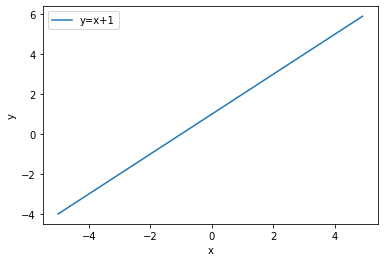

In [10]:
x = np.arange(-5,5,0.1)
y = x + 1
plt.plot(x, y, '-', label='y=x+1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 2)

&emsp;&emsp;于此同时，我们的建模数据为：

|Whole weight|Rings|      
|:--:|:--:|   
|1|2|      
|3|4|	      

&emsp;&emsp;将特征是为x、将标签是为y，则绘制图像可得：

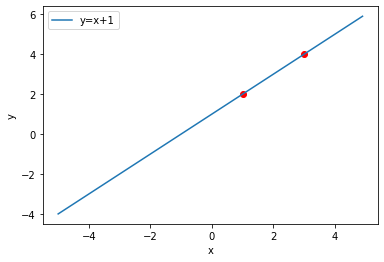

In [11]:
# 绘制对应位置元素点图
A = np.arange(1, 5).reshape(2, 2)
plt.plot(A[:,0], A[:, 1], 'ro')

# 线性回归直线
plt.plot(x, y, '-', label='y=x+1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 2)

&emsp;&emsp;由于模型方程是基于满足数据中x和y基本关系构建的，因此模型这条直线最终将穿过这两个点。而简单线性回归的几何意义，就是希望找到一条直线，尽可能的接近样本点。或者说，我们是通过一条直线去捕捉平面当中的点。当然，大多数情况下我们都无法对平面中的点进行完全的捕捉，而直线和点之间的差值，实际上就是SSE。

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/111.jpg" alt="7" style="zoom:30%;" />

&emsp;&emsp;而线性回归中回归的含义，则是：如果模型真实有效，则新数据也会像朝向这条直线“回归”一样，最终分布在这条直线附近。这就是简单线性回归中的“线性”和“回归”的形象理解。

> 当然，对于线性回归中的参数b，其实是bias（偏差或者截距）的简写，当x去职位0时，y=b，就好像直线在y轴上的截距，或者距离y=0的偏差。

&emsp;&emsp;形象理解只是辅助理解，若要从机器学习角度建好一个线性回归模型，需要从特征加权求和汇总角度理解模型本质。